# Wrangle and Analyze Data
The dataset used is @dog_rates (WeRateDogs) from twitter. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog.<br>
Wrangle the data and then visualize some interesting facts about the data. Using Tweepy to query Twitter's API for additional data beyond the data included in the WeRateDogs Twitter archive.

In [156]:
#import packages required
import os
import csv
import tweepy
import pandas as pd
import numpy as np
import json
import requests
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [157]:
# ignore warnigs
import warnings
warnings.filterwarnings("ignore")

## Gather

In [158]:
#reading the archive file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [159]:
#using requests to download image-predictions file programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

#extracting the file name from the url
filename = url.split('/')[-1]

#creating the file with same name and writing the content returned
with open(filename, mode='wb') as file:
    file.write(response.content)
file.close

<function BufferedWriter.close>

In [160]:
#reading the image-predictions file
img_prediction_df = pd.read_csv(filename, sep = '\t')

In [95]:
# setting twitter authorization variables
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = 'b2TndCQQv2G6Xh9vKyEDPhnWve5N7xe8uYbyOtdxawSpT'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

# declaring python dictionary to hold twitter data
twitter_dic = {}
    
#get tweet information by tweet Id using tweepy API get_status
for tweet in twitter_archive['tweet_id']:
    try:
        status = api.get_status(tweet, tweet_mode='extended')
        status = status._json    # making the output json serializable by adding _json
        twitter_dic[str(tweet)] = status
    except Exception as e:
        print("Error for: " + str(e) + " " + tweet)


TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U71') dtype('<U71') dtype('<U71')

In [ ]:
#reading the data from text file into python
with open('tweet_json.txt', 'w') as txtfile:  
    json.dump(twitter_dic, txtfile, indent=4)
txtfile.close

In [161]:
tweet_df = pd.read_json('tweet_json.txt', orient='index')

## Assess

In [162]:
#viewing first few records from twitter_archive csv file
twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [163]:
#displaying metadata of twitter_archive
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [164]:
#viewing first few records from image-predictions file
img_prediction_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [165]:
#checking the metadata information for image predictions file
img_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [166]:
#checking metadata for data fecthed from twitter
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2342 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2342 non-null datetime64[ns]
display_text_range               2342 non-null object
entities                         2342 non-null object
extended_entities                2068 non-null object
favorite_count                   2342 non-null int64
favorited                        2342 non-null int64
full_text                        2342 non-null object
geo                              0 non-null float64
id                               2342 non-null int64
id_str                           2342 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              

#### Quality Issues
- twitter_archive dataframe (twitter_archive)
    - removing all the columns that are not required for the analysis
    - there are 181 rewteets, which needs to be removed
    - ratings with decimal are wrongfully recorded with only digits after decimal
    - some places dog names are incorrectly fetched programmatically
- image dataframe (img_prediction_df)
    - prediction columns (p1, p2, p3), make data consistant by starting with upper case
    - remove (_) between the words for columns p1, p2, p3
- twitter data (tweet_df)
    - id needs to be renamed to tweet_id to match other dataframes
    - removing all the columns that are not required for the analysis
    - rewteets needs to be deleted from the dataframe
    
    
#### Tidyness Issues
- twitter_archive dataframe (twitter_archive)
    - datatype for numertor (ratings) needs to be float, to record the entries with decimal places
    - stages of dog need to be merged into 1 column
    - timestamp datatype needs to be changed to datetime
    - tweet_id needs to be converted to string

- image dataframe (img_prediction_df)
    - tweet_id needs to be converted to string

- twitter data (tweet_df)
    - id needs to be converted to string

#### Merging the 3 dataframes on tweet_id after cleaning and tidying the all dataframes

## Clean
#### Making copy of 3 dataframes to perform cleaning process

In [167]:
# making copy of 3 dataframes
twitter_archive_copy = twitter_archive.copy()
img_prediction_df_copy = img_prediction_df.copy()
tweet_df_copy = tweet_df.copy()

#### Define
Deleting rewteets

#### Code

In [168]:
# deleting 181 rewteets from twitter_archive_copy
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy['retweeted_status_id'].isnull()]

#### Test

In [169]:
twitter_archive_copy[twitter_archive_copy['retweeted_status_id'].notnull()==True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define
Converting the datatype of numerator column to float
#### Code

In [170]:
# converting the datatype of numerator to float64
twitter_archive_copy['rating_numerator'] = twitter_archive_copy['rating_numerator'].astype(float).fillna(0.0)

#### Test

In [171]:
# checking if the column 'rating_numerator' is converted to float
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(5), int64(2), object

#### Define
Converting tweet_id to string
#### Code

In [172]:
# converting tweet_id to string
twitter_archive_copy['tweet_id'] = twitter_archive_copy['tweet_id'].astype(str)

#### Test

In [173]:
# checking if the column 'tweet_id' is converted to string
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(5), int64(1), objec

#### Define
Correcting the incorrect dog names
#### Code

In [174]:
# listing dog names from twitter_archive_copy
twitter_archive_copy['name'].value_counts()

None         680
a             55
Charlie       11
Lucy          11
Cooper        10
Oliver        10
Penny          9
Tucker         9
Sadie          8
Winston        8
the            8
Lola           8
Daisy          7
Toby           7
Jax            6
Bo             6
Stanley        6
Bailey         6
Oscar          6
Bella          6
Koda           6
an             6
Scout          5
Chester        5
Bentley        5
Rusty          5
Buddy          5
Leo            5
Milo           5
Louis          5
            ... 
Gilbert        1
Betty          1
Raphael        1
Jameson        1
Levi           1
Ulysses        1
Clybe          1
Happy          1
Torque         1
Grizzwald      1
Timofy         1
Fizz           1
Kanu           1
Fillup         1
mad            1
Timber         1
Hamrick        1
Lassie         1
Iroh           1
Cermet         1
Huxley         1
Arlo           1
Grizz          1
Alejandro      1
Monkey         1
Rambo          1
Ronduh         1
Spark         

Here after listing dog names, all the dog names are starting with upper case.<br>
words like a, the, infuriating are not dog names.<br>
So the difference between a dog name and wrongfully recorded dog name (words) is that the words doesn't start with uppercase. 

In [175]:
# listing those values which have string 'name' or 'named' in the text and the dog name is incorrectly recorded
incorrect_dog_names = twitter_archive_copy.loc[(twitter_archive_copy['name'].str.islower()) & (twitter_archive_copy['text'].str.contains('name'))]
incorrect_dog_names

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
852,765395769549590528,NaN,NaN,2016-08-16 03:52:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is my dog. Her name is Zoey. She knows I'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765395769...,13.0,10,my,None,None,None,None
1853,675706639471788032,NaN,NaN,2015-12-12 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Sizzlin Menorah spaniel from Brookly...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675706639...,10.0,10,a,None,None,None,None
1955,673636718965334016,NaN,NaN,2015-12-06 22:54:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Lofted Aphrodisiac Terrier named Kip...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673636718...,10.0,10,a,None,None,None,None
2034,671743150407421952,NaN,NaN,2015-12-01 17:30:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Tuscaloosa Alcatraz named Jacob (Yac...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671743150...,11.0,10,a,None,None,None,None
2066,671147085991960577,NaN,NaN,2015-11-30 02:01:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Helvetica Listerine named Rufus. Thi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671147085...,9.0,10,a,None,None,None,None
2116,670427002554466305,NaN,NaN,2015-11-28 02:20:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Deciduous Trimester mix named Spork....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670427002...,9.0,10,a,None,None,None,None
2125,670361874861563904,NaN,NaN,2015-11-27 22:01:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Rich Mahogany Seltzer named Cherokee...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670361874...,9.0,10,a,None,None,None,None
2128,670303360680108032,NaN,NaN,2015-11-27 18:09:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Speckled Cauliflower Yosemite named ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670303360...,9.0,10,a,None,None,None,None
2146,669923323644657664,NaN,NaN,2015-11-26 16:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a spotted Lipitor Rumpelstiltskin name...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669923323...,10.0,10,a,None,None,None,None
2161,669564461267722241,NaN,NaN,2015-11-25 17:13:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Coriander Baton Rouge named Alfredo....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669564461...,10.0,10,a,None,None,None,None


In [176]:
# replacing incorrect dog names with correct ones for the above listed records
for (idx, row) in incorrect_dog_names.iterrows():
    #print (row['text'])
    split_txt = row['text'].split(' ')
    #print (row['name'])
    if row['text'].find('name is') != -1:
        dog_name = split_txt[split_txt.index('name')+2]
        if '.' in dog_name:
            dog_name = dog_name.rstrip('.')
    else:
        if row['text'].find('named') != -1:
            dog_name = split_txt[split_txt.index('named')+1]
            if '.' in dog_name:
                dog_name = dog_name.rstrip('.')
    #print(idx)
    incorrect_dog_names.loc[idx,'name'] = dog_name
    twitter_archive_copy.loc[idx,'name'] = dog_name


In [177]:
#checking if the corrected names are updated in the twitter_archive_copy dataframe
twitter_archive_copy.loc[(twitter_archive_copy['name'].str.islower()) & (twitter_archive_copy['text'].str.contains('name'))]
incorrect_dog_names

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
852,765395769549590528,NaN,NaN,2016-08-16 03:52:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is my dog. Her name is Zoey. She knows I'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765395769...,13.0,10,Zoey,None,None,None,None
1853,675706639471788032,NaN,NaN,2015-12-12 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Sizzlin Menorah spaniel from Brookly...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675706639...,10.0,10,Wylie,None,None,None,None
1955,673636718965334016,NaN,NaN,2015-12-06 22:54:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Lofted Aphrodisiac Terrier named Kip...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673636718...,10.0,10,Kip,None,None,None,None
2034,671743150407421952,NaN,NaN,2015-12-01 17:30:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Tuscaloosa Alcatraz named Jacob (Yac...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671743150...,11.0,10,Jacob,None,None,None,None
2066,671147085991960577,NaN,NaN,2015-11-30 02:01:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Helvetica Listerine named Rufus. Thi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671147085...,9.0,10,Rufus,None,None,None,None
2116,670427002554466305,NaN,NaN,2015-11-28 02:20:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Deciduous Trimester mix named Spork....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670427002...,9.0,10,Spork,None,None,None,None
2125,670361874861563904,NaN,NaN,2015-11-27 22:01:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Rich Mahogany Seltzer named Cherokee...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670361874...,9.0,10,Cherokee,None,None,None,None
2128,670303360680108032,NaN,NaN,2015-11-27 18:09:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Speckled Cauliflower Yosemite named ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670303360...,9.0,10,Hemry,None,None,None,None
2146,669923323644657664,NaN,NaN,2015-11-26 16:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a spotted Lipitor Rumpelstiltskin name...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669923323...,10.0,10,Alphred,None,None,None,None
2161,669564461267722241,NaN,NaN,2015-11-25 17:13:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Coriander Baton Rouge named Alfredo....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669564461...,10.0,10,Alfredo,None,None,None,None


In [178]:
#listing incorrect dog names whose text/tweet doesn't actually have dog names
twitter_archive_copy[twitter_archive_copy['name'].str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14.0,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14.0,10,a,None,None,pupper,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12.0,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12.0,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10.0,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14.0,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11.0,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13.0,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10.0,10,a,None,None,None,None
819,770655142660169732,NaN,NaN,2016-08-30 16:11:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770655142...,11.0,10,very,None,None,None,None


In [179]:
# replacing above listed dog names with None
twitter_archive_copy.loc[twitter_archive_copy['name'].str.islower(), 'name'] = 'None'

#### Test

In [180]:
# checking if all the incorrect dog names are changed to 'None'
twitter_archive_copy.loc[twitter_archive_copy['name'].str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define
Correct the wrongfully recorded rating_numerator values
#### Code

In [181]:
# checking whether the rating numerator column is updated successfully
twitter_archive_copy['rating_numerator'].value_counts()

12.0      500
10.0      442
11.0      426
13.0      307
9.0       156
8.0        98
7.0        54
14.0       43
5.0        36
6.0        32
3.0        19
4.0        17
2.0         9
1.0         8
0.0         2
420.0       2
84.0        1
24.0        1
27.0        1
15.0        1
17.0        1
960.0       1
143.0       1
99.0        1
666.0       1
121.0       1
182.0       1
165.0       1
45.0        1
75.0        1
204.0       1
1776.0      1
80.0        1
88.0        1
144.0       1
26.0        1
20.0        1
44.0        1
60.0        1
50.0        1
Name: rating_numerator, dtype: int64

In [182]:
# fetching the decimal ratings and updating the rating_numerator column
output = map(lambda x, y : (re.search('\d+\.\d+/10', x), y), twitter_archive_copy['text'], twitter_archive_copy['tweet_id'])

for otpt in list(output):
    if otpt[0] != None:
        rate_num = otpt[0].group().split('/')
        rate_num = rate_num[0]
        twitter_archive_copy.loc[twitter_archive_copy['tweet_id'] == otpt[1], ['rating_numerator']] = rate_num


In [183]:
# updating numerator & denominator of a row which has 2 fractions
twitter_archive_copy.loc[twitter_archive_copy['text'].str.contains('3 1/2'), 'rating_numerator'] = 9
twitter_archive_copy.loc[twitter_archive_copy['text'].str.contains('3 1/2'), 'rating_denominator'] = 10


#### Test

In [184]:
# checking if 'rating_numerator' values with decimal values are updated successdfully
twitter_archive_copy['rating_numerator'].value_counts()

12.0      500
10.0      442
11.0      426
13.0      307
9.0       157
8.0        98
7.0        54
14.0       43
5.0        34
6.0        32
3.0        19
4.0        17
2.0         9
1.0         7
0.0         2
420.0       2
13.5        1
15.0        1
17.0        1
20.0        1
24.0        1
1776.0      1
9.5         1
9.75        1
204.0       1
960.0       1
182.0       1
165.0       1
666.0       1
144.0       1
143.0       1
11.27       1
121.0       1
45.0        1
99.0        1
88.0        1
84.0        1
80.0        1
60.0        1
50.0        1
11.26       1
44.0        1
Name: rating_numerator, dtype: int64

In [185]:
# checking if the values are updated successfully
twitter_archive_copy[twitter_archive_copy['text'].str.contains('3 1/2')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,9,10,None,None,None,None,None


#### Define
Converting the timestamp column datatype to timestamp
#### Code

In [186]:
# converting the datetime column to datetime datatype
twitter_archive_copy['timestamp'] = pd.to_datetime(twitter_archive_copy['timestamp'])

#### Test

In [187]:
# checking if the conversion is done
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null object
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), f

#### Define
Extracting only date from tiemstamp column and making a new column
#### Code

In [188]:
# extracting date from the timestamp column
twitter_archive_copy['date'] = twitter_archive_copy['timestamp'].apply(lambda time: time.strftime('%m-%d-%Y'))

#### Test

In [189]:
# cheking if the timestamp column is divided
twitter_archive_copy.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,08-01-2017
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,08-01-2017
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,07-31-2017


#### Define
Merging 4 columns (the stages of dog) into 1 column
#### Code

In [190]:
# merging the 4 columns doggo, floofer, pupper, puppo into 1 named 'STAGE'
twitter_archive_copy['stage'] = twitter_archive_copy[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)

twitter_archive_copy['stage'].replace("NoneNoneNoneNone","None", inplace=True)
twitter_archive_copy['stage'].replace("doggoNoneNoneNone","doggo", inplace=True)
twitter_archive_copy['stage'].replace("NoneflooferNoneNone","floofer", inplace=True)
twitter_archive_copy['stage'].replace("NoneNonepupperNone","pupper", inplace=True)
twitter_archive_copy['stage'].replace("NoneNoneNonepuppo","puppo", inplace=True)

#### Define
Removing unwanted columns from twitter_archive_copy
#### Code

In [191]:
# remove unwanted columns from twitter_archive_copy columns
twitter_archive_copy.drop(['timestamp', 'retweeted_status_user_id', 'retweeted_status_id', 'retweeted_status_timestamp',
               'in_reply_to_status_id', 'in_reply_to_user_id', 'in_reply_to_status_id', 'expanded_urls',
               'source', 'doggo', 'floofer', 'pupper', 'puppo', 'text'], axis=1,inplace=True)

#### Test

In [192]:
twitter_archive_copy.head()

,tweet_id,rating_numerator,rating_denominator,name,date,stage
0,892420643555336193,13,10,Phineas,08-01-2017,None
1,892177421306343426,13,10,Tilly,08-01-2017,None
2,891815181378084864,12,10,Archie,07-31-2017,None
3,891689557279858688,13,10,Darla,07-30-2017,None
4,891327558926688256,12,10,Franklin,07-29-2017,None


#### Define
Replacing '_' with ' ' in p1, p2, p3, p4
#### Code

In [193]:
# replacing '_' with ' ' in p1, p2, p3
img_prediction_df_copy['p1'] = img_prediction_df_copy['p1'].str.replace('_', ' ')
img_prediction_df_copy['p2'] = img_prediction_df_copy['p2'].str.replace('_', ' ')
img_prediction_df_copy['p3'] = img_prediction_df_copy['p3'].str.replace('_', ' ')

#### Define
Data in p1, p2, p3, p4 in consistant format
#### Code

In [194]:
# making the column p1, p2, p3 data consistant by satarting the first letter with upper case
img_prediction_df_copy['p1'] = img_prediction_df_copy['p1'].str.title()
img_prediction_df_copy['p2'] = img_prediction_df_copy['p2'].str.title()
img_prediction_df_copy['p3'] = img_prediction_df_copy['p3'].str.title()

#### Test

In [195]:
# checking p1, p2, p3 for above changes
img_prediction_df_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define
Converting tweet_id datatype to string
#### Code

In [196]:
# converting the datatype
img_prediction_df_copy['tweet_id'] = img_prediction_df_copy['tweet_id'].astype(str)

#### Test

In [197]:
img_prediction_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Define
Changing the name if id ---> twitter_id
#### Code

In [198]:
# changing the id column to twitter_id in tweet_df_copy
tweet_df_copy.rename(columns={"id": "tweet_id"}, inplace=True)

#### Define
Converting the datatype of tweet_id (id) to string
#### Code

In [199]:
# convert the datatype of tweet_id to str
tweet_df_copy['tweet_id'] = tweet_df_copy['tweet_id'].astype(str)

#### Test

In [200]:
# cheking if the column is changed
tweet_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2342 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2342 non-null datetime64[ns]
display_text_range               2342 non-null object
entities                         2342 non-null object
extended_entities                2068 non-null object
favorite_count                   2342 non-null int64
favorited                        2342 non-null int64
full_text                        2342 non-null object
geo                              0 non-null float64
tweet_id                         2342 non-null object
id_str                           2342 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id             

In [201]:
# checking the retweets in tweet_df_copy
tweet_df_copy[tweet_df_copy['retweeted_status'].notnull()==True]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
1991-02-26 06:48:02.905632768,NaN,NaN,2015-11-20 03:51:47,"[0, 104]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667548406944960512, 'id_str'...",0,0,RT @dogratingrating: Unoriginal idea. Blatant ...,NaN,...,NaN,NaN,NaN,NaN,33,0,{'created_at': 'Fri Nov 20 03:41:59 +0000 2015...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1991-02-26 06:48:24.950915073,NaN,NaN,2015-11-20 03:51:52,"[0, 123]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667548685090197504, 'id_str'...",0,0,RT @dogratingrating: Exceptional talent. Origi...,NaN,...,NaN,NaN,NaN,NaN,35,0,{'created_at': 'Fri Nov 20 03:43:06 +0000 2015...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1992-07-24 17:26:49.858043904,NaN,NaN,2016-03-21 19:31:59,"[0, 97]","{'hashtags': [{'text': 'LoveTwitter', 'indices...","{'media': [{'id': 711998175234510848, 'id_str'...",0,0,RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,NaN,...,NaN,NaN,NaN,NaN,134,0,{'created_at': 'Mon Mar 21 19:29:52 +0000 2016...,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1993-07-28 05:05:15.802583040,NaN,NaN,2016-06-17 16:01:16,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,0,RT @dog_rates: Extremely intelligent dog here....,NaN,...,NaN,NaN,NaN,NaN,2244,0,{'created_at': 'Thu Nov 19 00:32:12 +0000 2015...,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1993-08-28 07:04:05.350707200,NaN,NaN,2016-06-25 01:52:36,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,0,RT @dog_rates: This is Shaggy. He knows exactl...,NaN,...,NaN,NaN,NaN,NaN,1058,0,{'created_at': 'Sat Nov 21 00:46:50 +0000 2015...,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1993-09-05 15:18:28.580548608,NaN,NaN,2016-06-27 01:37:04,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,0,RT @dog_rates: This pupper killed this great w...,NaN,...,NaN,NaN,NaN,NaN,3101,0,{'created_at': 'Tue Mar 01 20:11:59 +0000 2016...,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1993-11-03 06:49:54.570878976,NaN,NaN,2016-07-11 01:11:51,"[0, 74]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 675354114423808004, 'id_str'...",0,0,RT @dog_rates: Everyone needs to watch this. 1...,NaN,...,NaN,NaN,NaN,NaN,18067,0,{'created_at': 'Fri Dec 11 16:40:19 +0000 2015...,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1993-11-07 19:52:24.171524096,NaN,NaN,2016-07-12 03:11:42,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,0,RT @dog_rates: HEY PUP WHAT'S THE PART OF THE ...,NaN,...,NaN,NaN,NaN,NaN,3128,0,{'created_at': 'Sun Jan 03 05:11:12 +0000 2016...,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1993-11-14 17:37:14.498793472,NaN,NaN,2016-07-13 18:42:44,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,0,RT @dog_rates: This is Carly. She's actually 2...,NaN,...,NaN,NaN,NaN,NaN,6251,0,{'created_at': 'Mon Dec 28 17:12:42 +0000 2015...,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1993-12-02 23:27:21.593970688,NaN,NaN,2016-07-18 03:06:01,"[0, 81]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 679158360810352640, 'id_str'...",0,0,RT @dog_rates: This is Rubio. He has too much ...,NaN,...

#### Define
Deleting rewteets
#### Code

In [202]:
# deleting retweets
tweet_df_copy.drop(tweet_df_copy[tweet_df_copy['retweeted_status'].notnull()== True].index,inplace=True)

#### Test

In [203]:
# checking if the retweets were deletd successfully
tweet_df_copy[tweet_df_copy['retweeted_status'].notnull()==True]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user


In [204]:
tweet_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2174 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2174 non-null datetime64[ns]
display_text_range               2174 non-null object
entities                         2174 non-null object
extended_entities                1993 non-null object
favorite_count                   2174 non-null int64
favorited                        2174 non-null int64
full_text                        2174 non-null object
geo                              0 non-null float64
tweet_id                         2174 non-null object
id_str                           2174 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id             

#### Define
Removing unwanted columns
#### Code

In [205]:
# dropping unwanted columns
tweet_df_copy.drop(['contributors', 'coordinates', 'created_at', 'display_text_range', 'entities', 
                    'extended_entities', 'favorited', 'geo', 'quoted_status_permalink',
                    'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str',
                    'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
                    'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status', 'quoted_status_id',
                    'quoted_status_id_str', 'retweeted', 'retweeted_status', 'source', 'truncated', 'user'], 
                    axis=1,inplace=True)

#### Test

In [206]:
tweet_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2174 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 4 columns):
favorite_count    2174 non-null int64
full_text         2174 non-null object
tweet_id          2174 non-null object
retweet_count     2174 non-null int64
dtypes: int64(2), object(2)
memory usage: 84.9+ KB


### Merging all the cleaned Dataframes

In [207]:
# merging dataframes the clean dataframes
df_merge = pd.merge(twitter_archive_copy, img_prediction_df_copy, on='tweet_id', how='inner')
df_merge = pd.merge(df_merge, tweet_df_copy, on='tweet_id', how='inner')

In [208]:
df_merge.head(3)

,tweet_id,rating_numerator,rating_denominator,name,date,stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,full_text,retweet_count
0,891815181378084864,12,10,Archie,07-31-2017,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,24662,This is Archie. He is a rare Norwegian Pouncin...,4088
1,891689557279858688,13,10,Darla,07-30-2017,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,41519,This is Darla. She commenced a snooze mid meal...,8504
2,891327558926688256,12,10,Franklin,07-29-2017,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,39704,This is Franklin. He would like you to stop ca...,9202


#### Rearranging the columns in final clean dataframe

In [209]:
# rearraniging the columns
cols = ['tweet_id','date', 'name', 'stage', 'rating_numerator', 'rating_denominator', 'favorite_count', 
        'retweet_count', 'full_text', 'jpg_url', 'img_num', 
        'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']
df_merge = df_merge[cols]

In [210]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1299 entries, 0 to 1298
Data columns (total 20 columns):
tweet_id              1299 non-null object
date                  1299 non-null object
name                  1299 non-null object
stage                 1299 non-null object
rating_numerator      1299 non-null object
rating_denominator    1299 non-null int64
favorite_count        1299 non-null int64
retweet_count         1299 non-null int64
full_text             1299 non-null object
jpg_url               1299 non-null object
img_num               1299 non-null int64
p1                    1299 non-null object
p1_conf               1299 non-null float64
p1_dog                1299 non-null bool
p2                    1299 non-null object
p2_conf               1299 non-null float64
p2_dog                1299 non-null bool
p3                    1299 non-null object
p3_conf               1299 non-null float64
p3_dog                1299 non-null bool
dtypes: bool(3), float64(3), int64(4), o

#### Saving the clean dataframes to new files

In [211]:
# saving cleaned dataframes to files
final_folder = 'Clean_Files'
if not os.path.exists(final_folder):
    os.makedirs(final_folder)
    
twitter_archive_copy.to_csv(final_folder + '/twitter_archive_final.csv')
img_prediction_df_copy.to_csv(final_folder + '/image_prediction_final.csv')
tweet_df_copy.to_csv(final_folder + '/tweet_query_final.csv')
df_merge.to_csv(final_folder + '/twitter_archive_master.csv')

#### Reading the data from clean wrangled data

In [212]:
# reading in the new file with wrangeld data
df_master = pd.read_csv(final_folder + '/twitter_archive_master.csv')

In [213]:
df_master.head()

,Unnamed: 0,tweet_id,date,name,stage,rating_numerator,rating_denominator,favorite_count,retweet_count,full_text,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,0,891815181378084864,07-31-2017,Archie,None,12.0,10,24662,4088,This is Archie. He is a rare Norwegian Pouncin...,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
1,1,891689557279858688,07-30-2017,Darla,None,13.0,10,41519,8504,This is Darla. She commenced a snooze mid meal...,...,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
2,2,891327558926688256,07-29-2017,Franklin,None,12.0,10,39704,9202,This is Franklin. He would like you to stop ca...,...,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True
3,3,891087950875897856,07-29-2017,None,None,13.0,10,19931,3063,Here we have a majestic great white breaching ...,...,1,Chesapeake Bay Retriever,0.425595,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False
4,4,890729181411237888,07-28-2017,None,None,13.0,10,64428,18551,When you watch your owner call another dog a g...,...,2,Pomeranian,0.566142,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True


In [214]:
# dropping Unnamed: 0 column from df_master
df_master.drop(['Unnamed: 0'],axis=1,inplace=True)

In [215]:
# converting tweet_id datatype to string
df_master['tweet_id'] = df_master['tweet_id'].astype(str)

In [216]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 20 columns):
tweet_id              1299 non-null object
date                  1299 non-null object
name                  1299 non-null object
stage                 1299 non-null object
rating_numerator      1299 non-null float64
rating_denominator    1299 non-null int64
favorite_count        1299 non-null int64
retweet_count         1299 non-null int64
full_text             1299 non-null object
jpg_url               1299 non-null object
img_num               1299 non-null int64
p1                    1299 non-null object
p1_conf               1299 non-null float64
p1_dog                1299 non-null bool
p2                    1299 non-null object
p2_conf               1299 non-null float64
p2_dog                1299 non-null bool
p3                    1299 non-null object
p3_conf               1299 non-null float64
p3_dog                1299 non-null bool
dtypes: bool(3), float64(4), int64(4), 

#### Define
Converting the datatype of date column to datetime
#### Code

In [217]:
# converting date column to datetime datatype
df_master['date'] = pd.to_datetime(df_master['date'])

#### Test

In [218]:
# checking if the columns are converted to datetime
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 20 columns):
tweet_id              1299 non-null object
date                  1299 non-null datetime64[ns]
name                  1299 non-null object
stage                 1299 non-null object
rating_numerator      1299 non-null float64
rating_denominator    1299 non-null int64
favorite_count        1299 non-null int64
retweet_count         1299 non-null int64
full_text             1299 non-null object
jpg_url               1299 non-null object
img_num               1299 non-null int64
p1                    1299 non-null object
p1_conf               1299 non-null float64
p1_dog                1299 non-null bool
p2                    1299 non-null object
p2_conf               1299 non-null float64
p2_dog                1299 non-null bool
p3                    1299 non-null object
p3_conf               1299 non-null float64
p3_dog                1299 non-null bool
dtypes: bool(3), datetime64[ns]

## Statistical Description

In [219]:
df_master.describe()

,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1.299000e+03,1.299000e+03
mean,12.794088,10.551963,8192.563510,2477.678984,1.187067,0.587034,1.370495e-01,6.144723e-02
std,51.115686,7.870937,11451.830248,4002.328552,0.540746,0.273638,1.018687e-01,5.202736e-02
min,1.000000,7.000000,80.000000,12.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.000000,1687.000000,568.500000,1.000000,0.354703,5.438335e-02,1.649005e-02
50%,11.000000,10.000000,3780.000000,1234.000000,1.000000,0.578120,1.203580e-01,4.953060e-02
75%,12.000000,10.000000,10112.000000,2927.500000,1.000000,0.837040,1.982365e-01,9.470910e-02
max,1776.000000,170.000000,127518.000000,61239.000000,4.000000,1.000000,4.676780e-01,2.710420e-01


#### Observations
- Maximum value for rating_numerator is 1776 but mean is only 12.87.
- Maximum value of rating_denominator is 170 but mean is 10.
- Maximum value for favorite_count is 127518 and mean is 8192.
- retweet_count has the maximum value of 61239 and mean is 2477.
- Neural netwrok has the mean of 0.587 for first iteration, rest means are smaller, so the first ietration works better than any other iteration.

## Visualization
<b>Questions</b><br>
1. Does retweet_count & favorite_count increases or decreses over time for original tweets?
2. Does the favorite_count and retweet_count have any correlation, ie. if favorite_count increases does the retweet_count also increases or vice-a-versa? 
3. What are the most popular dog breeds on the group (at least 10 original tweets)?

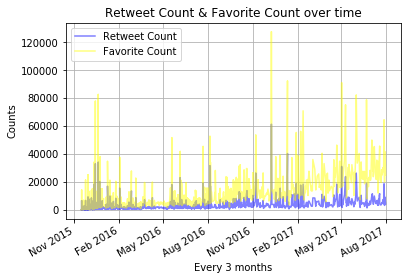

In [220]:
import datetime
import matplotlib.dates as mdates

#years = mdates.YearLocator()
#yearsFmt = mdates.DateFormatter('%Y')
months = mdates.MonthLocator(range(1, 13), bymonthday=1, interval=3)
monthsFmt = mdates.DateFormatter("%b %Y")

fig, ax = plt.subplots()
ax.plot(df_master['date'], df_master['retweet_count'], color = 'blue', label = 'Retweet Count', alpha=0.5)
ax.plot(df_master['date'], df_master['favorite_count'], color = 'yellow', label = 'Favorite Count', alpha=0.5)

# format the ticks
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
ax.xaxis.set_minor_locator(months)

ax.legend(loc="upper left")
ax.set_title('Retweet Count & Favorite Count over time')
ax.set_xlabel('Every 3 months')
ax.set_ylabel('Counts')
ax.autoscale_view()
ax.grid(True)

fig.autofmt_xdate()

plt.show()

Looking at the graph, it seems that the retweet_count has increased over time and favorite_count peaks at 1 point. But when 2 values are compared, retweet_count is less than the favorite_count at any point of time.

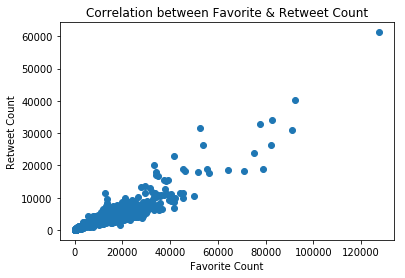

In [221]:
plt.scatter(df_master['favorite_count'], df_master['retweet_count'])
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count')
plt.title('Correlation between Favorite & Retweet Count')
plt.show();

Looking at this scatter plot, the two values are in positive correlation, as 1 increases the other increases too.

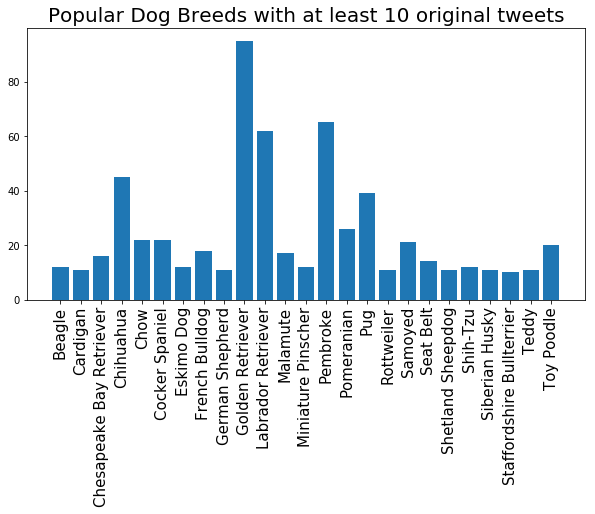

In [228]:
dog_breed = df_master['p1'].value_counts()[:25]
x = dog_breed.index
y = dog_breed.values

plt.bar(x, y)
plt.xticks(rotation='vertical', fontsize=15)
plt.title('Popular Dog Breeds with at least 10 original tweets', fontsize=20)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
#plt.legend()
plt.show();

Reference links for help used <br>
https://matplotlib.org/ <br>
https://stackoverflow.com/questions/ <br>
https://media.readthedocs.org/pdf/tweepy/latest/tweepy.pdf <br>
http://www.learningaboutelectronics.com/Articles/How-to-set-the-size-of-a-figure-in-matplotlib-with-Python.php <br>